# Neural Network for Regression

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

## PREPARE DATA

### DATASET

https://www.kaggle.com/kumargh/pimaindiansdiabetescsv

In [2]:
# Load dataset
diabetes = pd.read_csv('./Dataset/pima-indians-diabetes.csv')

In [3]:
# Head of dataset
diabetes.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Columns
diabetes.columns

Index(['1. Number of times pregnant',
       '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       '3. Diastolic blood pressure (mm Hg)',
       '4. Triceps skin fold thickness (mm)',
       '5. 2-Hour serum insulin (mu U/ml)',
       '6. Body mass index (weight in kg/(height in m)^2)',
       '7. Diabetes pedigree function', '8. Age (years)',
       '9. Class variable (0 or 1)'],
      dtype='object')

In [5]:
# Change names of columns
diabetes.columns = ['preg', 'plasma', 'blood', 'triceps', 'hour', 'mass', 'diabetes', 'age', 'class']

In [6]:
# Columns to normalize
cols_to_norm = ['preg', 'plasma', 'blood',
       'triceps',
       'hour',
       'mass',
       'diabetes']

In [7]:
# Normalize columns in dataset
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x-x.min())/ x.max()-x.min())

In [8]:
cols_to_norm

['preg', 'plasma', 'blood', 'triceps', 'hour', 'mass', 'diabetes']

In [9]:
# Head of dataset
diabetes.head()

,preg,plasma,blood,triceps,hour,mass,diabetes,age,class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.148860,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.034810,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.167455,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,-0.041223,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.835223,33,1


In [10]:
# Numeric columns
num_preg = tf.feature_column.numeric_column('preg')
plasma_gluc = tf.feature_column.numeric_column('plasma')
dias_press = tf.feature_column.numeric_column('blood')
tricep = tf.feature_column.numeric_column('triceps')
insulin = tf.feature_column.numeric_column('hour')
bmi = tf.feature_column.numeric_column('mass')
diabetes_pedigree = tf.feature_column.numeric_column('diabetes')
age = tf.feature_column.numeric_column('age')

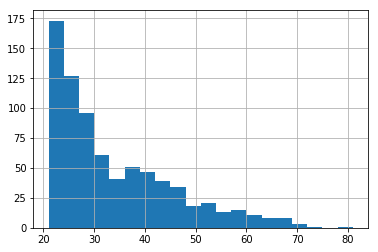

In [11]:
# Histogram for 'age' column
diabetes['age'].hist(bins=20)

In [12]:
# Bucketized 'age' column
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [13]:
# # All feature columns
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,age_bucket]

In [14]:
# Split data for training and testing
x_data = diabetes.drop('class', axis=1)
labels = diabetes['class']
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.3,random_state=101)

In [15]:
# Input function
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train,
                                                batch_size=10, num_epochs = 1000,
                                                shuffle=True)

## Linear Classifier

In [ ]:
# Create linear classifier estimator
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

In [ ]:
# Traing model
model.train(input_fn=input_func, steps=1000)

In [18]:
# Input function to test
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle = False)

In [ ]:
# Evaluate model
results = model.evaluate(eval_input_func)

In [20]:
# Metrics for test data
results

{'accuracy': 0.72727275,
 'accuracy_baseline': 0.64935064,
 'auc': 0.79539096,
 'auc_precision_recall': 0.64290243,
 'average_loss': 0.52899414,
 'label/mean': 0.35064936,
 'loss': 5.0915685,
 'precision': 0.62857145,
 'prediction/mean': 0.37169334,
 'recall': 0.54320985,
 'global_step': 1000}

In [21]:
# Input function to predict
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10,
                                                     num_epochs = 1,
                                                     shuffle=False)

In [22]:
# Predictions
predictions = model.predict(pred_input_func)

In [ ]:
# Predictions to list
my_pred = list(predictions)

## DNN Classifier

In [ ]:
# Create DNN classifier estimator
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10, 20, 20, 20, 10],
                                       feature_columns = feat_cols, n_classes =2)

In [ ]:
# Train model
dnn_model.train(input_fn=input_func, steps = 1000)

In [26]:
# Input function to test
eval_input_funcs = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10,
                                                      num_epochs=1, shuffle=False)

In [ ]:
# Evaluate model
dnn_results = dnn_model.evaluate(eval_input_func)

In [28]:
# Metrics for test data
dnn_results

{'accuracy': 0.7619048,
 'accuracy_baseline': 0.64935064,
 'auc': 0.82670784,
 'auc_precision_recall': 0.7047931,
 'average_loss': 0.49097422,
 'label/mean': 0.35064936,
 'loss': 4.725627,
 'precision': 0.6666667,
 'prediction/mean': 0.3433578,
 'recall': 0.6419753,
 'global_step': 1000}